# Machine Learning

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from 
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import RUSBoostClassifier


In [44]:
X_resampled = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/X_train_L_J_1942-01-17_ON_ON_all_extraction_features_over100.csv')
y_resampled = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train/y_train_L_J_1942-01-17_ON_ON_all_extraction_features_over100.csv')
X_test = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test/X_test_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')
y_test = pd.read_csv('C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test/y_test_L_J_1942-01-17_OFF_OFF_all_extraction_features_over100.csv')



In [45]:
# On transforme les étiquettes en Series
y_resampled = y_resampled.iloc[:, -1]
y_test = y_test.iloc[:, -1]

# Nb échantillons de chaque classe dans train et test

In [46]:
# Pour y_resampled
class_counts_resampled = y_resampled.value_counts()

# Pour y_test
class_counts_test = y_test.value_counts()

print("Nombre d'échantillons par classe dans y_resampled :")
print(class_counts_resampled)

print("Nombre d'échantillons par classe dans y_test :")
print(class_counts_test)


Nombre d'échantillons par classe dans y_resampled :
0    2433
1    2433
Name: label, dtype: int64
Nombre d'échantillons par classe dans y_test :
1    1437
0     216
Name: label, dtype: int64


# Application du RandomForest

In [47]:
# Initialisation du RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf.fit(X_resampled, y_resampled)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

Matrice de confusion :
 [[ 216    0]
 [1437    0]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.13      1.00      0.23       216
           1       0.00      0.00      0.00      1437

    accuracy                           0.13      1653
   macro avg       0.07      0.50      0.12      1653
weighted avg       0.02      0.13      0.03      1653



c:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\antho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


True Negatives (TN): 487 - Le modèle a correctement prédit la classe négative (non-FOG) pour 487 échantillons.

False Positives (FP): 29 - Le modèle a incorrectement prédit la classe positive (FOG) pour 29 échantillons qui étaient en réalité négatifs.

False Negatives (FN): 32 - Le modèle a incorrectement prédit la classe négative pour 32 échantillons qui étaient en réalité positifs.

True Positives (TP): 182 - Le modèle a correctement prédit la classe positive pour 182 échantillons.

Rappel (également appelé sensibilité ou taux de vrais positifs) est la proportion des cas positifs réels que le modèle a correctement identifié

# Application du RUSBOOSTING

In [6]:
# Initialiser le modèle RUSBoost
rusboost = RUSBoostClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rusboost.fit(X_resampled, y_resampled)

# Prédictions
y_pred = rusboost.predict(X_test)

# Évaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

KeyboardInterrupt: 

# SVM

In [7]:
from sklearn import svm
# Pour la classification
model = svm.SVC(kernel='linear')  # Le noyau peut être 'linear', 'poly', 'rbf', 'sigmoid', etc.
model.fit(X_resampled, y_resampled)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[632  22]
 [ 13 152]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       654
           1       0.87      0.92      0.90       165

    accuracy                           0.96       819
   macro avg       0.93      0.94      0.93       819
weighted avg       0.96      0.96      0.96       819



# Batch Process

In [10]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


def load_train(train_folder):
    data_dict = {}
    for file in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file)
        # Extract a common identifier by stripping off 'X_train_' or 'y_train_' and everything after '_over'
        if file.startswith('X_train') or file.startswith('y_train'):
            identifier = file.split('_over')[0].replace('X_train_', '').replace('y_train_', '')
            print("Processing:", identifier)
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if 'X_train' in file:
                print(f"Ajout de X_train {identifier}")
                data_dict[identifier]['X_train'] = pd.read_csv(file_path)
                
            elif 'y_train' in file:
                print(f"Ajout de y_train {identifier}")
                data_dict[identifier]['y_train'] = pd.read_csv(file_path).squeeze()  # Convert DataFrame to Series directly
                
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

def load_test(test_folder):
    data_dict = {}
    for file in os.listdir(test_folder):
        file_path = os.path.join(test_folder, file)
        # Extract a common identifier by stripping off 'X_train_' or 'y_train_' and everything after '_over'
        if file.startswith('X_test') or file.startswith('y_test'):
            identifier = file.split('_over')[0].replace('X_test_', '').replace('y_test_', '')
            print("Processing:", identifier)
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if 'X_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['X_test'] = pd.read_csv(file_path)
            elif 'y_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['y_test'] = pd.read_csv(file_path).squeeze()  # Convert DataFrame to Series directly
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

#Pour regrouper les données train et test en un seul dictionnaire et en fonction de l'identifiant
from collections import defaultdict

def group_data(data_dicts):
    grouped_data = defaultdict(dict)
    for data_dict in data_dicts:
        for key, value in data_dict.items():
            grouped_data[key].update(value)
    return dict(grouped_data)


def train_models(data_dict):
    results = {}
    for identifier, data in data_dict.items():
        print("Training models for:", identifier)
        X_train = data['X_train']
        y_train = data['y_train']
        X_test = data['X_test']
        y_test = data['y_test']
        # Initialize models
        models = {
            "RandomForest": RandomForestClassifier()
        }
        results[identifier] = {}
        for model_name, model in models.items():
            print(f"Training {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # Save results
            results[identifier][model_name] = {
                'Confusion Matrix': confusion_matrix(y_test, y_pred),
                'Classification Report': classification_report(y_test, y_pred, output_dict=True)
            }

    return results


In [11]:
import pandas as pd
base_train_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train"
base_test_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test"

train_data = load_train(base_train_path)
test_data = load_test(base_test_path)
data_dict = group_data([train_data, test_data])

#Assuming 'data_dict' is already filled with training and testing data
results = train_models(data_dict)



Processing: A_P_1956-02-21_OFF_OFF_all_extraction_features
Ajout de X_train A_P_1956-02-21_OFF_OFF_all_extraction_features
Processing: A_P_1956-02-21_ON_ON_all_extraction_features
Ajout de X_train A_P_1956-02-21_ON_ON_all_extraction_features
Processing: L_J_1942-01-17_OFF_OFF_all_extraction_features
Ajout de X_train L_J_1942-01-17_OFF_OFF_all_extraction_features
Processing: L_J_1942-01-17_ON_ON_all_extraction_features
Ajout de X_train L_J_1942-01-17_ON_ON_all_extraction_features
Processing: P_P_1963-04-01_OFF_OFF_all_extraction_features
Ajout de X_train P_P_1963-04-01_OFF_OFF_all_extraction_features
Processing: P_P_1963-04-01_ON_ON_all_extraction_features
Ajout de X_train P_P_1963-04-01_ON_ON_all_extraction_features
Processing: R_J_1961-10-08_OFF_OFF_all_extraction_features
Ajout de X_train R_J_1961-10-08_OFF_OFF_all_extraction_features
Processing: R_J_1961-10-08_ON_ON_all_extraction_features
Ajout de X_train R_J_1961-10-08_ON_ON_all_extraction_features
Processing: V_E_1900-00-00_OFF_O

In [12]:
#To view results:
for identifier, model_results in results.items():
    print(f"Results for {identifier}:")
    for model_name, metrics in model_results.items():
        print(f"{model_name} - Confusion Matrix:\n{metrics['Confusion Matrix']}")
        print(f"{model_name} - Classification Report:\n")
        for key, value in metrics['Classification Report'].items():
            print(f"{key}: {value}")
        print("\n")

Results for A_P_1956-02-21_OFF_OFF_all_extraction_features:
RandomForest - Confusion Matrix:
[[634  20]
 [ 21 144]]
RandomForest - Classification Report:

0: {'precision': 0.9679389312977099, 'recall': 0.9694189602446484, 'f1-score': 0.9686783804430863, 'support': 654.0}
1: {'precision': 0.8780487804878049, 'recall': 0.8727272727272727, 'f1-score': 0.8753799392097265, 'support': 165.0}
accuracy: 0.9499389499389499
macro avg: {'precision': 0.9229938558927574, 'recall': 0.9210731164859605, 'f1-score': 0.9220291598264063, 'support': 819.0}
weighted avg: {'precision': 0.949829193955055, 'recall': 0.9499389499389499, 'f1-score': 0.9498819911836182, 'support': 819.0}


SVM - Confusion Matrix:
[[633  21]
 [  9 156]]
SVM - Classification Report:

0: {'precision': 0.985981308411215, 'recall': 0.9678899082568807, 'f1-score': 0.9768518518518519, 'support': 654.0}
1: {'precision': 0.8813559322033898, 'recall': 0.9454545454545454, 'f1-score': 0.9122807017543859, 'support': 165.0}
accuracy: 0.963369

In [16]:
def view_specific_results(results, identifier):
    if identifier in results:
        print(identifier)
        model_results = results[identifier]
        print(f"Results for {identifier}:")
        for model_name, metrics in model_results.items():
            print(f"{model_name} - Confusion Matrix:\n{metrics['Confusion Matrix']}")
            print(f"{model_name} - Classification Report:\n")
            for key, value in metrics['Classification Report'].items():
                print(f"{key}: {value}")
            print("\n")
    else:
        print("No results found for this identifier.")

# Example of usage
identifier = 'L_J_1942-01-17_OFF_OFF_all_extraction_features'  # Replace 'some_identifier' with the actual identifier you want to check
view_specific_results(results, identifier)


L_J_1942-01-17_OFF_OFF_all_extraction_features
Results for L_J_1942-01-17_OFF_OFF_all_extraction_features:
RandomForest - Confusion Matrix:
[[ 165   51]
 [  31 1406]]
RandomForest - Classification Report:

0: {'precision': 0.8418367346938775, 'recall': 0.7638888888888888, 'f1-score': 0.8009708737864077, 'support': 216.0}
1: {'precision': 0.9649965682910089, 'recall': 0.9784272790535838, 'f1-score': 0.9716655148583275, 'support': 1437.0}
accuracy: 0.9503932244404114
macro avg: {'precision': 0.9034166514924432, 'recall': 0.8711580839712363, 'f1-score': 0.8863181943223677, 'support': 1653.0}
weighted avg: {'precision': 0.9489030873127994, 'recall': 0.9503932244404114, 'f1-score': 0.9493605889832308, 'support': 1653.0}


SVM - Confusion Matrix:
[[ 180   36]
 [  47 1390]]
SVM - Classification Report:

0: {'precision': 0.7929515418502202, 'recall': 0.8333333333333334, 'f1-score': 0.8126410835214447, 'support': 216.0}
1: {'precision': 0.9747545582047685, 'recall': 0.9672929714683368, 'f1-scor

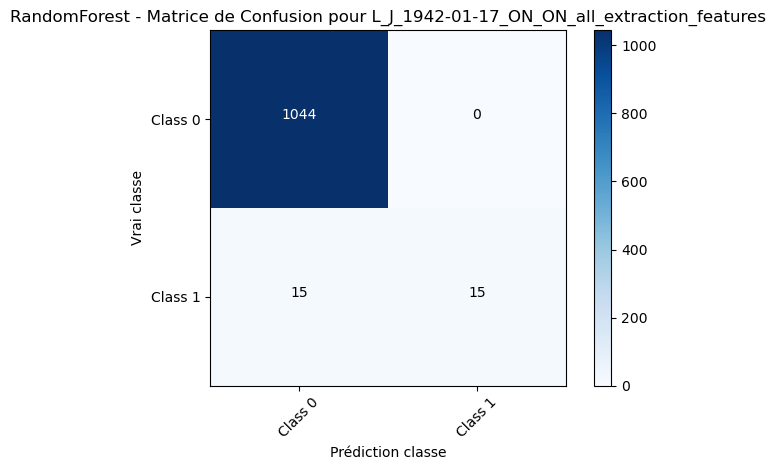

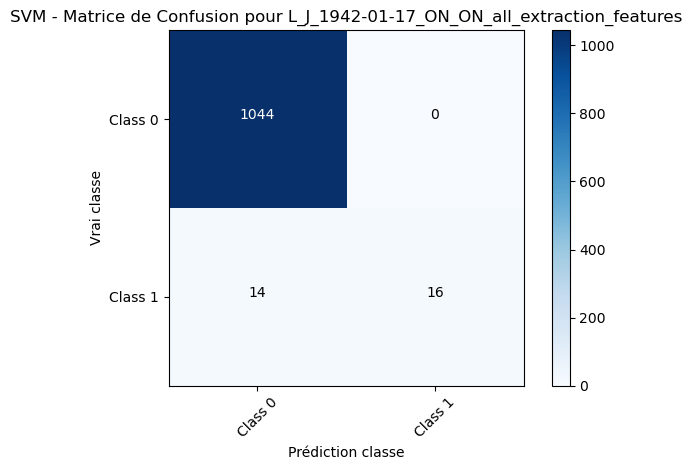

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Affichage des valeurs dans la matrice
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Vrai classe')
    plt.xlabel('Prédiction classe')
    plt.tight_layout()

# Pour chaque modèle dans les résultats
for model_name, metrics in results['L_J_1942-01-17_ON_ON_all_extraction_features'].items():
    cm = metrics['Confusion Matrix']
    classes = ['Class 0', 'Class 1']  # Ajustez selon vos classes
    plt.figure()
    plot_confusion_matrix(cm, classes, title=f'{model_name} - Matrice de Confusion pour {identifier}')
    plt.show()


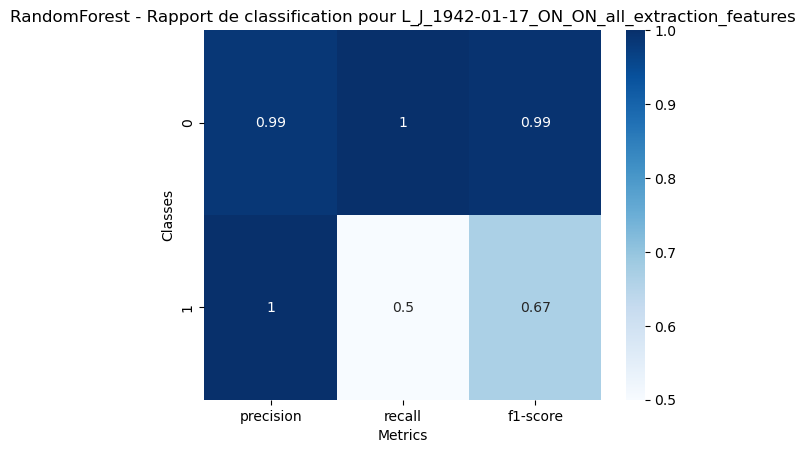

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_classification_report(cr, title='Classification Report'):
    labels = list(cr.keys())[:-3]  # Exclure 'accuracy', 'macro avg', et 'weighted avg'
    vals = [[v for k, v in cr[label].items() if k != 'support'] for label in labels]
    sns.heatmap(vals, annot=True, xticklabels=['precision', 'recall', 'f1-score'], yticklabels=labels, cmap='Blues')
    plt.title(title)
    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.show()

# Exemple d'utilisation de la fonction
identifier = 'L_J_1942-01-17_ON_ON_all_extraction_features'
model_name = 'RandomForest'
cr = results[identifier][model_name]['Classification Report']
plot_classification_report(cr, title=f'{model_name} - Rapport de classification pour {identifier}')


In [24]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict

# Charger les données d'entraînement
def load_train(train_folder, method):
    data_dict = {}
    for file in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file)
        if file.startswith(f'X_train') or file.startswith(f'y_train'):
            identifier = file.split(f'_{method}')[0].replace(f'X_train_', '').replace(f'y_train_', '') # On sélectionne la partie avant méthode et on remplace X_train et y_train par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_train' in file:
                print(f"Ajout de X_train {identifier}")
                data_dict[identifier]['X_train'] = pd.read_csv(file_path)
            elif f'y_train' in file:
                print(f"Ajout de y_train {identifier}")
                data_dict[identifier]['y_train'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Charger les données de test
def load_test(test_folder, method):
    data_dict = {}
    for file in os.listdir(test_folder):
        file_path = os.path.join(test_folder, file)
        if file.startswith(f'X_test') or file.startswith(f'y_test'):
            identifier = file.split(f'_{method}')[0].replace(f'X_test_', '').replace(f'y_test_', '') # On sélectionne la partie avant méthode et on remplace X_test_ et y_test_ par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['X_test'] = pd.read_csv(file_path)
            elif f'y_test' in file:
                print(f"Ajout de y_test {identifier}")
                data_dict[identifier]['y_test'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Regrouper les données
def group_data(data_dicts):
    print("Grouper les données d'entrainement et de test...")
    grouped_data = defaultdict(dict)
    for data_dict in data_dicts:
        for key, value in data_dict.items():
            grouped_data[key].update(value)
    print("Données regroupées pour les identifiants:", list(grouped_data.keys()))
    return dict(grouped_data)

# Charger les scores d'importance des caractéristiques
def load_feature_importances(importances_folder, method):
    print("Chargement des scores d'importance des caractéristiques...")
    feature_importances = {}
    for file in os.listdir(importances_folder):
        if file.endswith(f'{method}_feature_importances.csv'):
            print("Processing:", file)
            file_path = os.path.join(importances_folder, file)
            identifier = file.split(f'_{method}_feature_importances')[0]
            print("Identifier:", identifier)
            feature_importances[identifier] = pd.read_csv(file_path)
    print("Feature importances loaded for identifiers:", list(feature_importances.keys()))
    return dict(feature_importances)



# Sélectionner les caractéristiques importantes
def select_features(feature_importances, X, top_n=10):
    # Sélectionner les caractéristiques les plus importantes
    top_features = feature_importances['Feature'].head(top_n).tolist()
    #selected_features = feature_importances.index[:top_n]
    return X[top_features]


# Entraîner les modèles
# def train_models(data_dict, feature_importances, top_n=10):
#     results = {}
    
#     for identifier, data in data_dict.items():
#         # Extraction du premier identifiant
#         print(f"Application des {top_n} meilleures caractéristiques sur les données X_train et X_test :", identifier)
#         X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
#         y_train = data['y_train']
#         X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
#         y_test = data['y_test']
        
#         print("Réduction des données terminées pour :", identifier)

#         # Initialize models
#         models = {
#             "RandomForest": RandomForestClassifier()
#         }
#         results[identifier] = {}
#         for model_name, model in models.items():
#             print(f"Training {model_name} pour {identifier}...")
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             # Save results
#             results[identifier][model_name] = {
#                 'Confusion Matrix': confusion_matrix(y_test, y_pred),
#                 'Classification Report': classification_report(y_test, y_pred, output_dict=True)
#             }
#             print(f"Training {model_name} pour {identifier} terminé.")
    
#     print("Training terminé pour tous les identifiants.")
#     return results


# Entraîner les modèles et stocker les résultats
def train_models(data_dict, feature_importances, top_n=10):
    results = []
    
    for identifier, data in data_dict.items():
        print("Training models for:", identifier)
        X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
        y_train = data['y_train']
        X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
        y_test = data['y_test']
        
        # Initialize models
        models = {
            "RandomForest": RandomForestClassifier()
        }
        for model_name, model in models.items():
            print(f"Training {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # Collect results
            result = {
                'Identifier': identifier,
                'Model': model_name,
                'Confusion Matrix': confusion_matrix(y_test, y_pred).tolist(),  # Convert to list for better CSV formatting
                'Classification Report': classification_report(y_test, y_pred, output_dict=True)
            }
            results.append(result)
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    output_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_test.csv"
    results_df.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")
    return results


# Exemples d'utilisation des fonctions
train_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train"
test_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test"
importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_condition"
#train_data = load_train(train_folder, 'over100')
#test_data = load_test(test_folder, 'over100')
#grouped_data = group_data([train_data, test_data])

feature_importances = load_feature_importances(importances_folder, 'over100')
results = train_models(grouped_data, feature_importances, top_n=10)


Chargement des scores d'importance des caractéristiques...
Processing: A_P_1956-02-21_OFF_OFF_all_extraction_features_over100_feature_importances.csv
Identifier: A_P_1956-02-21_OFF_OFF_all_extraction_features
Processing: A_P_1956-02-21_ON_ON_all_extraction_features_over100_feature_importances.csv
Identifier: A_P_1956-02-21_ON_ON_all_extraction_features
Processing: L_J_1942-01-17_OFF_OFF_all_extraction_features_over100_feature_importances.csv
Identifier: L_J_1942-01-17_OFF_OFF_all_extraction_features
Processing: L_J_1942-01-17_ON_ON_all_extraction_features_over100_feature_importances.csv
Identifier: L_J_1942-01-17_ON_ON_all_extraction_features
Processing: P_P_1963-04-01_OFF_OFF_all_extraction_features_over100_feature_importances.csv
Identifier: P_P_1963-04-01_OFF_OFF_all_extraction_features
Processing: P_P_1963-04-01_ON_ON_all_extraction_features_over100_feature_importances.csv
Identifier: P_P_1963-04-01_ON_ON_all_extraction_features
Processing: R_J_1961-10-08_OFF_OFF_all_extraction_fea

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from collections import defaultdict

# Charger les données d'entraînement
def load_train(train_folder, method):
    data_dict = {}
    for file in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file)
        if file.startswith(f'X_train') or file.startswith(f'y_train'):
            identifier = file.split(f'_{method}')[0].replace(f'X_train_', '').replace(f'y_train_', '') # On sélectionne la partie avant méthode et on remplace X_train et y_train par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_train' in file:
                print(f"Ajout de X_train {identifier}")
                data_dict[identifier]['X_train'] = pd.read_csv(file_path)
            elif f'y_train' in file:
                print(f"Ajout de y_train {identifier}")
                data_dict[identifier]['y_train'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Charger les données de test
def load_test(test_folder, method):
    data_dict = {}
    for file in os.listdir(test_folder):
        file_path = os.path.join(test_folder, file)
        if file.startswith(f'X_test') or file.startswith(f'y_test'):
            identifier = file.split(f'_{method}')[0].replace(f'X_test_', '').replace(f'y_test_', '') # On sélectionne la partie avant méthode et on remplace X_test_ et y_test_ par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['X_test'] = pd.read_csv(file_path)
            elif f'y_test' in file:
                print(f"Ajout de y_test {identifier}")
                data_dict[identifier]['y_test'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Regrouper les données
def group_data(data_dicts):
    print("Grouper les données d'entrainement et de test...")
    grouped_data = defaultdict(dict)
    for data_dict in data_dicts:
        for key, value in data_dict.items():
            grouped_data[key].update(value)
    print("Données regroupées pour les identifiants:", list(grouped_data.keys()))
    return dict(grouped_data)

# Charger les scores d'importance des caractéristiques
def load_feature_importances(importances_folder, method):
    print("Chargement des scores d'importance des caractéristiques...")
    feature_importances = {}
    for file in os.listdir(importances_folder):
        if file.endswith(f'{method}_feature_importances.csv'):
            print("Processing:", file)
            file_path = os.path.join(importances_folder, file)
            identifier = file.split(f'_{method}_feature_importances')[0]
            print("Identifier:", identifier)
            feature_importances[identifier] = pd.read_csv(file_path)
    print("Feature importances loaded for identifiers:", list(feature_importances.keys()))
    return dict(feature_importances)



# Sélectionner les caractéristiques importantes
def select_features(feature_importances, X, top_n=10):
    # Sélectionner les caractéristiques les plus importantes
    top_features = feature_importances['Feature'].head(top_n).tolist()
    #selected_features = feature_importances.index[:top_n]
    return X[top_features]


# Entraîner les modèles
# def train_models(data_dict, feature_importances, top_n=10):
#     results = {}
    
#     for identifier, data in data_dict.items():
#         # Extraction du premier identifiant
#         print(f"Application des {top_n} meilleures caractéristiques sur les données X_train et X_test :", identifier)
#         X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
#         y_train = data['y_train']
#         X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
#         y_test = data['y_test']
        
#         print("Réduction des données terminées pour :", identifier)

#         # Initialize models
#         models = {
#             "RandomForest": RandomForestClassifier()
#         }
#         results[identifier] = {}
#         for model_name, model in models.items():
#             print(f"Training {model_name} pour {identifier}...")
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             # Save results
#             results[identifier][model_name] = {
#                 'Confusion Matrix': confusion_matrix(y_test, y_pred),
#                 'Classification Report': classification_report(y_test, y_pred, output_dict=True)
#             }
#             print(f"Training {model_name} pour {identifier} terminé.")
    
#     print("Training terminé pour tous les identifiants.")
#     return results


# Entraîner les modèles et stocker les résultats
# Calculer la distribution des classes
def calculate_distribution(y):
    return y.value_counts().to_dict()

# Entraîner les modèles et stocker les résultats
def train_models(data_dict, feature_importances, top_n=10):
    results = []
    
    for identifier, data in data_dict.items():
        print("Training models for:", identifier)
        X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
        y_train = data['y_train']
        X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
        y_test = data['y_test']
        
        # Initialize models
        models = {
            "RandomForest": RandomForestClassifier()
        }
        for model_name, model in models.items():
            print(f"Training {model_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Calculer les métriques
            report = classification_report(y_test, y_pred, output_dict=True)
            auc = roc_auc_score(y_test, y_pred_proba)
            train_distribution = calculate_distribution(y_train)
            test_distribution = calculate_distribution(y_test)

            # Collect results
            result = {
                'Identifier': identifier,
                'Model': model_name,
                'F1-Score': report['weighted avg']['f1-score'],
                'Accuracy': report['accuracy'],
                'Recall': report['weighted avg']['recall'],
                'Support': report['weighted avg']['support'],
                'AUC': auc,
                'Train Distribution': train_distribution,
                'Test Distribution': test_distribution
            }
            results.append(result)
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    output_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results.csv"
    results_df.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")
    return results


# Exemples d'utilisation des fonctions
train_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train"
test_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test"
importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_condition"
#train_data = load_train(train_folder, 'over100')
#test_data = load_test(test_folder, 'over100')
#grouped_data = group_data([train_data, test_data])

feature_importances = load_feature_importances(importances_folder, 'over100')
results = train_models(grouped_data, feature_importances, top_n=10)


# _________________________________________________________________________________________________________________

In [30]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from collections import defaultdict

# Charger les données d'entraînement
def load_train(train_folder, method):
    data_dict = {}
    for file in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file)
        if file.startswith(f'X_train') or file.startswith(f'y_train'):
            identifier = file.split(f'_{method}')[0].replace(f'X_train_', '').replace(f'y_train_', '') # On sélectionne la partie avant méthode et on remplace X_train et y_train par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_train' in file:
                print(f"Ajout de X_train {identifier}")
                data_dict[identifier]['X_train'] = pd.read_csv(file_path)
            elif f'y_train' in file:
                print(f"Ajout de y_train {identifier}")
                data_dict[identifier]['y_train'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Charger les données de test
def load_test(test_folder, method):
    data_dict = {}
    for file in os.listdir(test_folder):
        file_path = os.path.join(test_folder, file)
        if file.startswith(f'X_test') or file.startswith(f'y_test'):
            identifier = file.split(f'_{method}')[0].replace(f'X_test_', '').replace(f'y_test_', '') # On sélectionne la partie avant méthode et on remplace X_test_ et y_test_ par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['X_test'] = pd.read_csv(file_path)
            elif f'y_test' in file:
                print(f"Ajout de y_test {identifier}")
                data_dict[identifier]['y_test'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Regrouper les données
def group_data(data_dicts):
    print("Grouper les données d'entrainement et de test...")
    grouped_data = defaultdict(dict)
    for data_dict in data_dicts:
        for key, value in data_dict.items():
            grouped_data[key].update(value)
    print("Données regroupées pour les identifiants:", list(grouped_data.keys()))
    return dict(grouped_data)

# Charger les scores d'importance des caractéristiques
def load_feature_importances(importances_folder, method):
    print("Chargement des scores d'importance des caractéristiques...")
    feature_importances = {}
    for file in os.listdir(importances_folder):
        if file.endswith(f'{method}_feature_importances.csv'):
            print("Processing:", file)
            file_path = os.path.join(importances_folder, file)
            identifier = file.split(f'_{method}_feature_importances')[0]
            print("Identifier:", identifier)
            feature_importances[identifier] = pd.read_csv(file_path)
    print("Feature importances loaded for identifiers:", list(feature_importances.keys()))
    return dict(feature_importances)



# Sélectionner les caractéristiques importantes
def select_features(feature_importances, X, top_n=10):
    # Sélectionner les caractéristiques les plus importantes
    top_features = feature_importances['Feature'].head(top_n).tolist()
    #selected_features = feature_importances.index[:top_n]
    return X[top_features]

# Entraîner les modèles et stocker les résultats
# Calculer la distribution des classes
def calculate_distribution(y):
    return y.value_counts().to_dict()

# Entraîner les modèles et stocker les résultats
def train_models(data_dict, feature_importances, top_n_values, method = 'brut'):
    results = []
    
    for top_n in top_n_values:
        for identifier, data in data_dict.items():
            print(f"Training models for: {identifier} with top {top_n} features")
            X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
            y_train = data['y_train']
            X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
            y_test = data['y_test']
            
            # Initialize models
            models = {
                "RandomForest": RandomForestClassifier(),
                "SVM": SVC(random_state=42)
            }
            for model_name, model in models.items():
                print(f"Training {model_name}...")
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1

                # Calculer les métriques
                report = classification_report(y_test, y_pred, output_dict=True)
                auc = roc_auc_score(y_test, y_pred_proba)
                cm = confusion_matrix(y_test, y_pred)
                train_distribution = calculate_distribution(y_train)
                test_distribution = calculate_distribution(y_test)

                # Collect results
                result = {
                    'Identifier': identifier,
                    'Model': model_name,
                    'Top N Features': top_n,
                    'F1-Score (weighted avg)': report['weighted avg']['f1-score'],
                    'Accuracy': report['accuracy'],
                    'Recall (weighted avg)': report['weighted avg']['recall'],
                    'Support (weighted avg)': report['weighted avg']['support'],
                    'AUC': auc,
                    'Train Distribution 0': train_distribution.get(0, 0),
                    'Train Distribution 1': train_distribution.get(1, 0),
                    'Test Distribution 0': test_distribution.get(0, 0),
                    'Test Distribution 1': test_distribution.get(1, 0),
                    'F1-Score (class 0)': report['0']['f1-score'],
                    'F1-Score (class 1)': report['1']['f1-score'],
                    'Recall (class 0)': report['0']['recall'],
                    'Recall (class 1)': report['1']['recall'],
                    'Precision (class 0)': report['0']['precision'],
                    'Precision (class 1)': report['1']['precision'],
                    'Support (class 0)': report['0']['support'],
                    'Support (class 1)': report['1']['support'],
                    'Confusion Matrix TN': cm[0, 0],
                    'Confusion Matrix FP': cm[0, 1],
                    'Confusion Matrix FN': cm[1, 0],
                    'Confusion Matrix TP': cm[1, 1]
                }
                results.append(result)
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    output_path = f"C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_{method}.csv"
    results_df.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")
    return results

# # Exemples d'utilisation des fonctions
# train_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/train"
# test_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_over100/test"
# importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_condition"
# #train_data = load_train(train_folder, 'over100')
# #test_data = load_test(test_folder, 'over100')
# #grouped_data = group_data([train_data, test_data])

# feature_importances = load_feature_importances(importances_folder, 'over100')
# top_n_values = [10, 20]
# results = train_models(grouped_data, feature_importances, top_n_values, method = 'over100')


In [31]:
# Exemples d'utilisation des fonctions
train_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/train"
test_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/ON_OFF_all_features_final_data_brute/test"
importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_condition"
train_data = load_train(train_folder, 'brut')
test_data = load_test(test_folder, 'brut')
grouped_data = group_data([train_data, test_data])

feature_importances = load_feature_importances(importances_folder, 'brut')
top_n_values = [10, 20]
results = train_models(grouped_data, feature_importances, top_n_values)

Processing: A_P_1956-02-21_OFF_OFF_all_extraction_features_brut
Ajout de X_train A_P_1956-02-21_OFF_OFF_all_extraction_features
Processing: A_P_1956-02-21_ON_ON_all_extraction_features_brut
Ajout de X_train A_P_1956-02-21_ON_ON_all_extraction_features
Processing: L_J_1942-01-17_OFF_OFF_all_extraction_features_brut
Ajout de X_train L_J_1942-01-17_OFF_OFF_all_extraction_features
Processing: L_J_1942-01-17_ON_ON_all_extraction_features_brut
Ajout de X_train L_J_1942-01-17_ON_ON_all_extraction_features
Processing: P_P_1963-04-01_OFF_OFF_all_extraction_features_brut
Ajout de X_train P_P_1963-04-01_OFF_OFF_all_extraction_features
Processing: P_P_1963-04-01_ON_ON_all_extraction_features_brut
Ajout de X_train P_P_1963-04-01_ON_ON_all_extraction_features
Processing: R_J_1961-10-08_OFF_OFF_all_extraction_features_brut
Ajout de X_train R_J_1961-10-08_OFF_OFF_all_extraction_features
Processing: R_J_1961-10-08_ON_ON_all_extraction_features_brut
Ajout de X_train R_J_1961-10-08_ON_ON_all_extraction_f

In [32]:
print(train_data)

{'A_P_1956-02-21_OFF_OFF_all_extraction_features': {'X_train':       Foot_Left_ACC_X_Mean_Temporal  Foot_Left_ACC_X_Ecart_Type_Temporal  \
0                          1.547405                             0.938144   
1                          0.811107                            -2.841605   
2                          0.038937                            -1.857406   
3                          0.537374                             1.245338   
4                          0.097774                             0.732755   
...                             ...                                  ...   
1904                      -0.433845                            -0.236690   
1905                       1.242829                            -0.152851   
1906                      -0.875104                             0.812037   
1907                      -1.002754                             0.553573   
1908                       0.998167                            -1.173447   

      Foot_Left_ACC_X_Va

# Par patient

In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from collections import defaultdict
import time

# Charger les données d'entraînement
def load_train(train_folder, method):
    data_dict = {}
    for file in os.listdir(train_folder):
        file_path = os.path.join(train_folder, file)
        if file.startswith(f'X_train') or file.startswith(f'y_train'):
            identifier = file.split(f'_{method}')[0].replace(f'X_train_', '').replace(f'y_train_', '') # On sélectionne la partie avant méthode et on remplace X_train et y_train par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_train' in file:
                print(f"Ajout de X_train {identifier}")
                data_dict[identifier]['X_train'] = pd.read_csv(file_path)
            elif f'y_train' in file:
                print(f"Ajout de y_train {identifier}")
                data_dict[identifier]['y_train'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Charger les données de test
def load_test(test_folder, method):
    data_dict = {}
    for file in os.listdir(test_folder):
        file_path = os.path.join(test_folder, file)
        if file.startswith(f'X_test') or file.startswith(f'y_test'):
            identifier = file.split(f'_{method}')[0].replace(f'X_test_', '').replace(f'y_test_', '') # On sélectionne la partie avant méthode et on remplace X_test_ et y_test_ par rien
            print("Processing:", f'{identifier}_{method}')
            if identifier not in data_dict:
                data_dict[identifier] = {}
            if f'X_test' in file:
                print(f"Ajout de X_test {identifier}")
                data_dict[identifier]['X_test'] = pd.read_csv(file_path)
            elif f'y_test' in file:
                print(f"Ajout de y_test {identifier}")
                data_dict[identifier]['y_test'] = pd.read_csv(file_path).squeeze()
    print("Data loaded for identifiers:", list(data_dict.keys()))
    return data_dict

# Regrouper les données
def group_data(data_dicts):
    print("Grouper les données d'entrainement et de test...")
    grouped_data = defaultdict(dict)
    for data_dict in data_dicts:
        for key, value in data_dict.items():
            grouped_data[key].update(value)
    print("Données regroupées pour les identifiants:", list(grouped_data.keys()))
    return dict(grouped_data)

# Charger les scores d'importance des caractéristiques
def load_feature_importances(importances_folder, method):
    print("Chargement des scores d'importance des caractéristiques...")
    feature_importances = {}
    for file in os.listdir(importances_folder):
        if file.endswith(f'{method}_feature_importances.csv'):
            print("Processing:", file)
            file_path = os.path.join(importances_folder, file)
            identifier = file.split(f'_{method}_feature_importances')[0]
            print("Identifier:", identifier)
            feature_importances[identifier] = pd.read_csv(file_path)
    print("Feature importances loaded for identifiers:", list(feature_importances.keys()))
    return dict(feature_importances)

# Sélectionner les caractéristiques importantes
def select_features(feature_importances, X, top_n=10):
    # Sélectionner les caractéristiques les plus importantes
    top_features = feature_importances['Feature'].head(top_n).tolist()
    return X[top_features]

# Calculer la distribution des classes
def calculate_distribution(y):
    return y.value_counts().to_dict()

# Entraîner les modèles et stocker les résultats
def train_models(data_dict, feature_importances, top_n_values, nature = "by_patient", method='brut'):
    results = []
    
    for top_n in top_n_values:
        for identifier, data in data_dict.items():
            print(f"Training models for: {identifier} with top {top_n} features")
            X_train = select_features(feature_importances[identifier], data['X_train'], top_n)
            y_train = data['y_train']
            X_test = select_features(feature_importances[identifier], data['X_test'], top_n)
            y_test = data['y_test']
            
            # Initialize models
            models = {
                "RandomForest": RandomForestClassifier(random_state=42)
            }
            for model_name, model in models.items():
                print(f"Training {model_name}...")

                # Measure training time
                start_train_time = time.time()
                
                # Perform cross-validation
                skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
                cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
                
                # Fit the model on the entire training set
                model.fit(X_train, y_train)
                train_time = time.time() - start_train_time

                # Measure prediction time
                start_predict_time = time.time()
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1
                predict_time = time.time() - start_predict_time

                # Calculer les métriques
                auc = roc_auc_score(y_test, y_pred_proba)
                cm = confusion_matrix(y_test, y_pred)
                TN = cm[0, 0]
                FP = cm[0, 1]
                FN = cm[1, 0]
                TP = cm[1, 1]
                
                
                # Calcul des métriques selon les formules fournies, convertis en pourcentage et arrondis
                sensitivity = round((TP / (TP + FN)) * 100, 1)
                specificity = round((TN / (TN + FP)) * 100, 1)
                ppv = round((TP / (TP + FP)) * 100, 1)
                npv = round((TN / (TN + FN)) * 100, 1)
                accuracy = round(((TP + TN) / (TP + TN + FP + FN)) * 100, 1)
                f_score = round(2 * (sensitivity * ppv) / (sensitivity + ppv), 1)
                youden_index = round(sensitivity + specificity - 100, 1)

                train_distribution = calculate_distribution(y_train)
                test_distribution = calculate_distribution(y_test)

                # Collect results
                result = {
                    'Identifier': identifier,
                    'Model': model_name,
                    'Top N Features': top_n,
                    'CV Accuracy Mean Accuracy': cv_scores.mean(),
                    'Sensitivity': sensitivity,
                    'Specificity': specificity,
                    'PPV': ppv,
                    'NPV': npv,
                    'Accuracy': accuracy,
                    'F-score': f_score,
                    'Youden Index': youden_index,
                    'AUC': auc,
                    'Train Time': train_time,
                    'Predict Time': predict_time,
                    'Train Distribution 0': train_distribution.get(0, 0),
                    'Train Distribution 1': train_distribution.get(1, 0),
                    'Test Distribution 0': test_distribution.get(0, 0),
                    'Test Distribution 1': test_distribution.get(1, 0),
                    'Confusion Matrix TN': TN,
                    'Confusion Matrix FP': FP,
                    'Confusion Matrix FN': FN,
                    'Confusion Matrix TP': TP
                }
                results.append(result)
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    output_path = f"C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/resultats_ML_condition/model_results_details_{nature}_{method}.csv"
    results_df.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")
    return results

# ML pour les données over avec Relief f over

In [ ]:
# # Exemples d'utilisation des fonctions
train_folder_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_over100/train"
test_folder_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_over100/test"


importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient"
train_data_over = load_train(train_folder_over, 'over100')
test_data_over = load_test(test_folder_over, 'over100')
grouped_data_over = group_data([train_data_over, test_data_over])

feature_importances = load_feature_importances(importances_folder, 'over100')
top_n_values = [5, 10, 20, 30, 50, 80, 100, 200]
results = train_models(grouped_data_over, feature_importances, top_n_values, nature = "by_patient",method='over100')

# ML pour les données optimisées avec Relief f optimisée

In [4]:
train_folder_optimise = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_optimise/train"
test_folder_optimise = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_optimise/test"

importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient"
train_data_optimise = load_train(train_folder_optimise, 'optimise')
test_data_optimise = load_test(test_folder_optimise, 'optimise')
grouped_data_optimise = group_data([train_data_optimise, test_data_optimise])

feature_importances = load_feature_importances(importances_folder, 'optimise')
top_n_values = [5, 10, 20, 30, 50, 80, 100, 200]
results = train_models(grouped_data_optimise, feature_importances, top_n_values, nature = "by_patient",method='optimise')

Processing: A_P_1956-02-21_all_extraction_features_optimise
Ajout de X_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_optimise
Ajout de X_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_optimise
Ajout de X_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_optimise
Ajout de X_train R_J_1961-10-08_all_extraction_features
Processing: V_E_1900-00-00_all_extraction_features_optimise
Ajout de X_train V_E_1900-00-00_all_extraction_features
Processing: A_P_1956-02-21_all_extraction_features_optimise
Ajout de y_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_optimise
Ajout de y_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_optimise
Ajout de y_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_optimise
Ajout de y_t

# ML pour les données brute avec Relief f brute

In [3]:
train_folder_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/train"
test_folder_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/test"

importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient"
train_data_brute = load_train(train_folder_brute, 'brut')
test_data_brute = load_test(test_folder_brute, 'brut')
grouped_data_brute = group_data([train_data_brute, test_data_brute])

feature_importances = load_feature_importances(importances_folder, 'brut')
top_n_values = [5, 10, 20, 30, 50, 80, 100, 200]
results = train_models(grouped_data_brute, feature_importances, top_n_values, nature = "by_patient",method='brut')

Processing: A_P_1956-02-21_all_extraction_features_brut
Ajout de X_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_brut
Ajout de X_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_brut
Ajout de X_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_brut
Ajout de X_train R_J_1961-10-08_all_extraction_features
Processing: V_E_1900-00-00_all_extraction_features_brut
Ajout de X_train V_E_1900-00-00_all_extraction_features
Processing: A_P_1956-02-21_all_extraction_features_brut
Ajout de y_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_brut
Ajout de y_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_brut
Ajout de y_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_brut
Ajout de y_train R_J_1961-10-08_all_extraction_f

# ML pour les données over avec Relief f brute

In [5]:
train_folder_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_over100/train"
test_folder_over = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_over100/test"

importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient"
train_data_over = load_train(train_folder_over, 'over100')
test_data_over = load_test(test_folder_over, 'over100')
grouped_data_over = group_data([train_data_over, test_data_over])

feature_importances = load_feature_importances(importances_folder, 'brut') # Caractéristiques issues du relief f brut
top_n_values = [5, 10, 20, 30, 50, 80, 100, 200]
results = train_models(grouped_data_over, feature_importances, top_n_values, nature = "by_patient_relief_brute_",method='over100')

Processing: A_P_1956-02-21_all_extraction_features_over100
Ajout de X_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_over100
Ajout de X_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_over100
Ajout de X_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_over100
Ajout de X_train R_J_1961-10-08_all_extraction_features
Processing: V_E_1900-00-00_all_extraction_features_over100
Ajout de X_train V_E_1900-00-00_all_extraction_features
Processing: A_P_1956-02-21_all_extraction_features_over100
Ajout de y_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_over100
Ajout de y_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_over100
Ajout de y_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_over100
Ajout de y_train R_J_

# ML pour les données brute avec Relief f over

In [6]:
train_folder_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/train"
test_folder_brute = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/all_features_by_patient_final_data_brute/test"

importances_folder = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/score_importance_relief_by_patient"
train_data_brute = load_train(train_folder_brute, 'brut')
test_data_brute = load_test(test_folder_brute, 'brut')
grouped_data_brute = group_data([train_data_brute, test_data_brute])

feature_importances = load_feature_importances(importances_folder, 'over100') # Caractéristiques issues du relief f over
top_n_values = [5, 10, 20, 30, 50, 80, 100, 200]
results = train_models(grouped_data_brute, feature_importances, top_n_values, nature = "by_patient_relief_over_",method='brut')

Processing: A_P_1956-02-21_all_extraction_features_brut
Ajout de X_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_brut
Ajout de X_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_brut
Ajout de X_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_brut
Ajout de X_train R_J_1961-10-08_all_extraction_features
Processing: V_E_1900-00-00_all_extraction_features_brut
Ajout de X_train V_E_1900-00-00_all_extraction_features
Processing: A_P_1956-02-21_all_extraction_features_brut
Ajout de y_train A_P_1956-02-21_all_extraction_features
Processing: L_J_1942-01-17_all_extraction_features_brut
Ajout de y_train L_J_1942-01-17_all_extraction_features
Processing: P_P_1963-04-01_all_extraction_features_brut
Ajout de y_train P_P_1963-04-01_all_extraction_features
Processing: R_J_1961-10-08_all_extraction_features_brut
Ajout de y_train R_J_1961-10-08_all_extraction_f